In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

# Create Session 
spark = SparkSession.builder.appName("IPL DATA ANALYSIS").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,DecimalType,BooleanType,DateType
from pyspark.sql.functions import col,when,sum,avg,row_number
from pyspark.sql.window import Window

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df  = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-pyspark/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df  = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-pyspark/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df  = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-pyspark/Player.csv")

In [0]:
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Adjust precision and scale if needed
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df  = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-pyspark/Player_match.csv")


In [0]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|        

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-pyspark/Team.csv")

In [0]:
team_df.show(5)

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
+-------+-------+--------------------+
only showing top 5 rows



In [0]:
# Filter to include only valid deliveries(excluding extras likes wides or no balls)

ball_by_ball_df = ball_by_ball_df.filter(~col("extra_type").isin("wides","noballs"))

# Aggregation: Calculate the total and avg runs scored in each match and inning

total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
    )

In [0]:
total_and_avg_runs.show(5)

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|          avg_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
| 1082632|         2|       202|1.8363636363636364|
|  335993|         2|       131|1.6794871794871795|
| 1082617|         1|       123|1.0165289256198347|
+--------+----------+----------+------------------+
only showing top 5 rows



In [0]:
# Windows Function: Calculate running total of runs in each match for each over

window_spec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(window_spec)
    )


In [0]:
display(ball_by_ball_df.select("running_total_runs"))

running_total_runs
0
0
0
0
0
0
18
18
18
18


In [0]:
# Conditional Column: Flag for high imparct balls (either wicket or more than 6 runs including extras)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year,month,dayofmonth,when 

# Extracting year,month,day from the match date for more detailed time based analysis 

match_df = match_df.withColumn("year",year("match_date"))
match_df = match_df.withColumn("month",month("match_date"))
match_df = match_df.withColumn("day",dayofmonth("match_date"))

# High margin win : Categorizing win margin in High,Midium and Low
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100 , "High").
    when((col("win_margin") >= 50) & (col("win_margin") < 100) , "Medium").
    otherwise("Low")
)

# Analyze the impact of the toss : who wins the and toss and the match

match_df = match_df.withColumn(
    "toss_match_winner",
    when((col("match_winner")) == (col("toss_winner")),"Yes")
    .otherwise("No")
)

match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import regexp_replace,lower

# Normalize and clean player names
player_df = player_df.withColumn("player_name",lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handel missing values in 'batting hand' and 'bowling skill' with default 'Unknowm'
player_df = player_df.na.fill({"batting_hand":"Unknown", "bowling_skill":"Unknown"})

# Categorizing Player based on their batting hand
player_df = player_df.withColumn("batting_style",when(col("batting_hand").contains("Left"),"Left-Hander").otherwise("Right_Hander"))

# Show the modified player Dataframe
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|        0|        1|     sc ganguly|null| Left-hand bat|  Right-arm medium|       India|  Left-Hander|
|        1|        2|    bb mccullum|null|Right-hand bat|  Right-arm medium| New Zealand| Right_Hander|
|        2|        3|     rt ponting|null|Right-hand bat|  Right-arm medium|   Australia| Right_Hander|
|        3|        4|      dj hussey|null|Right-hand bat|Right-arm offbreak|   Australia| Right_Hander|
|        4|        5|mohammad hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| Right_Hander|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|            

In [0]:
from pyspark.sql.functions import col, when, current_date,expr 

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35,"Veteran").otherwise("Non-Veteran")
)
# Dynamic column to calculate year since debut 
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the modified Dataframe
player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT p.player_name,m.season_year,SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name,m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show(10)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       399|
+-------------+-----------+----------+
only showing top 10 rows



In [0]:
economical_bowlers_in_powerplay = spark.sql("""
SELECT p.player_name,
AVG(b.runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) > 30
ORDER BY avg_runs_per_ball,total_wickets DESC
""")

economical_bowlers_in_powerplay.show(10)

+-----------------+------------------+-------------+
|      player_name| avg_runs_per_ball|total_wickets|
+-----------------+------------------+-------------+
|       ag murtaza|0.6538461538461539|            0|
|       fh edwards|0.6923076923076923|            0|
|         a kumble|0.7685185185185185|            0|
|         umar gul|0.7777777777777778|            0|
|  smsm senanayake|0.8492063492063492|            0|
|        a symonds|0.8859649122807017|            0|
|       t thushara|               0.9|            0|
|        sp narine|0.9186507936507936|            0|
|mustafizur rahman|0.9215686274509803|            0|
|       gd mcgrath|0.9324324324324325|            0|
+-----------------+------------------+-------------+
only showing top 10 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id,m.toss_winner,m.toss_name AS opt_to,m.match_winner,
    CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id 
""")

toss_impact_individual_matches.show(10)

+--------+--------------------+------+--------------------+-------------+
|match_id|         toss_winner|opt_to|        match_winner|match_outcome|
+--------+--------------------+------+--------------------+-------------+
|  335987|Royal Challengers...| field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|   bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|   bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|   bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|   bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|   bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|   bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians| field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals| field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians| field|     Kings XI Punjab|         Lost|
+--------+--------------------+------+

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name,
AVG(b.runs_scored) AS avg_runs_in_wins,
COUNT(*) AS innings_played
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id =  p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

average_runs_in_wins.show(15)

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   rashid khan|               6.0|             1|
| shahid afridi|3.3333333333333335|             6|
|      an ahmed|               3.0|             3|
|      ba bhatt|               3.0|             2|
|       sn khan|2.5789473684210527|            19|
|    sp jackson|               2.4|             5|
| harmeet singh|2.3333333333333335|             6|
|      umar gul|2.3076923076923075|            13|
|    sm pollock|               2.2|            15|
|       ms gony|2.1379310344827585|            29|
|mj mcclenaghan|               2.0|            11|
|   ds kulkarni|               2.0|             3|
|       pr shah|               2.0|             4|
| shivam sharma|               2.0|             2|
|     vrv singh|               2.0|             2|
+--------------+------------------+--------------+
only showing top 15 rows



In [0]:
import matplotlib.pyplot as plt

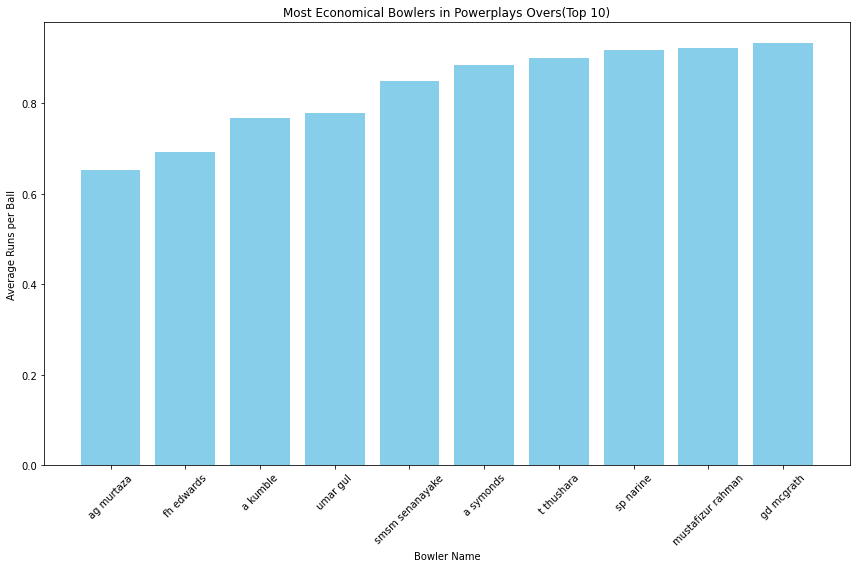

In [0]:
economical_bowlers_pd = economical_bowlers_in_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot 
top_economical_bowlers = economical_bowlers_pd.nsmallest(10,'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color = 'skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplays Overs(Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns 

Out[33]: <function matplotlib.pyplot.show(close=None, block=None)>

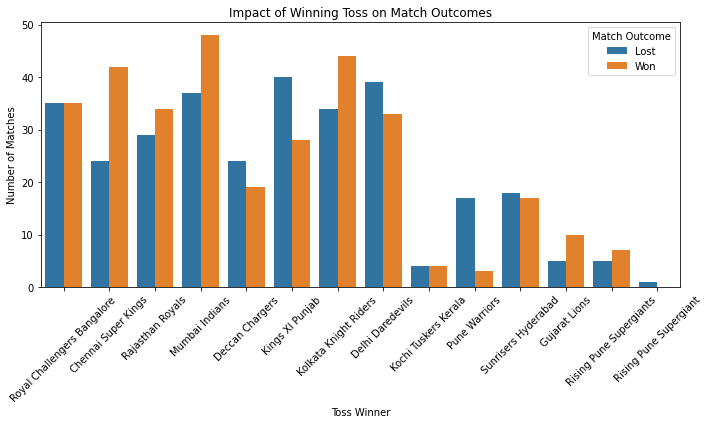

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()
# Creating a countplot to show win/loss after winning toss
plt.figure(figsize = (10,6))
sns.countplot(x='toss_winner', hue='match_outcome',data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

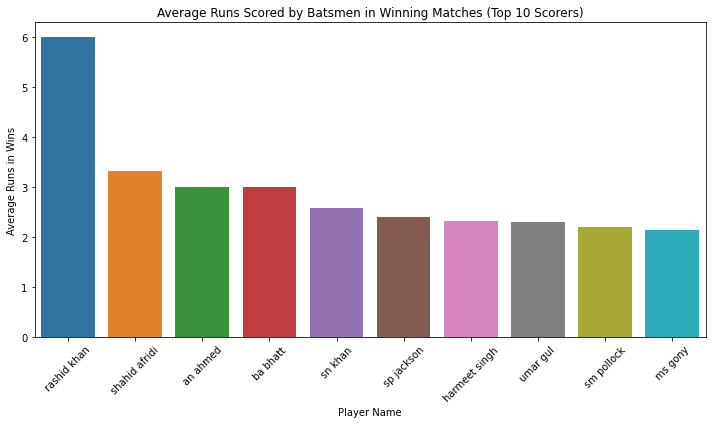

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches 
plt.figure(figsize=(10,6))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y = 'avg_runs_in_wins',data = top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [0]:
scores_by_venue = spark.sql("""
SELECT venue_name,
AVG(total_runs) AS average_score,
MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

scores_by_venue.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.2|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.46666666666664|          377|
|Rajiv Gandhi Inte...|           302.375|          366|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Holkar Cricket St...|             297.4|          377|
|    Wankhede Stadium| 297.0877192982456|          435|
|Punjab Cricket As...|296.77142857142854|          426|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.8030303030303|       

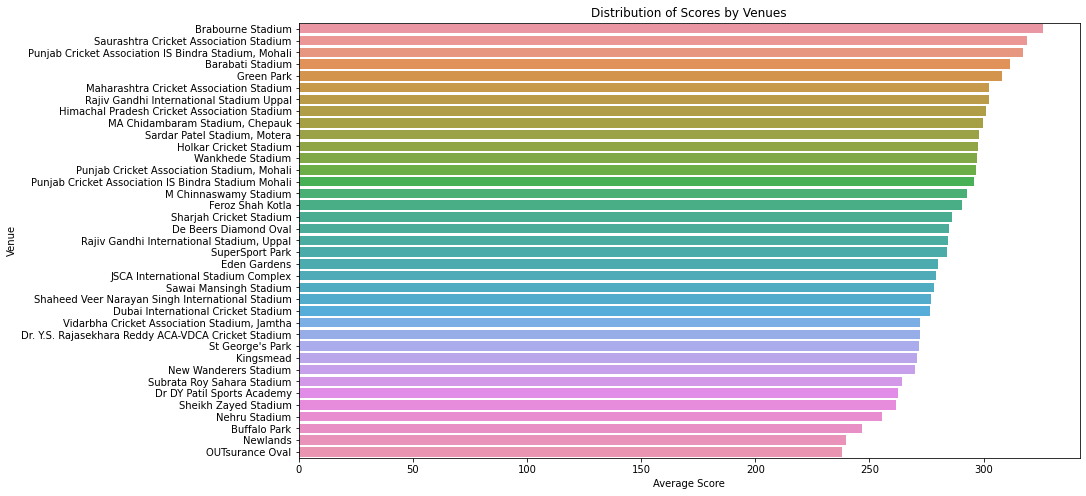

In [0]:
# Convert to pandas dataframe
scores_by_venue_pd = scores_by_venue.toPandas()

# plot
plt.figure(figsize = (14,8))
sns.barplot(x = 'average_score', y = 'venue_name',data = scores_by_venue_pd)
plt.title('Distribution of Scores by Venues')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()


In [0]:
# Dismissal Type 
dismissal_type = spark.sql("""
SELECT out_type,COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL 
GROUP BY out_type
ORDER BY frequency DESC
""")

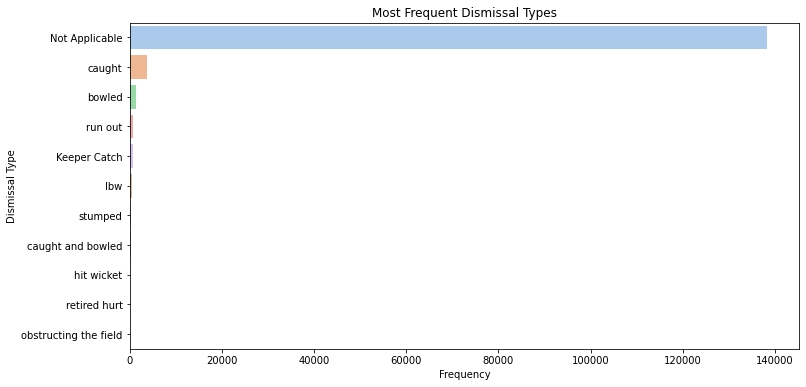

In [0]:
# Plot
dismissal_type_pd = dismissal_type.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x='frequency',y='out_type', data = dismissal_type_pd, palette ='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
# Team toss winning performance
team_toss_win_performance = spark.sql("""
SELECT team1,COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1 
GROUP BY team1 
ORDER BY wins_after_toss DESC
""")

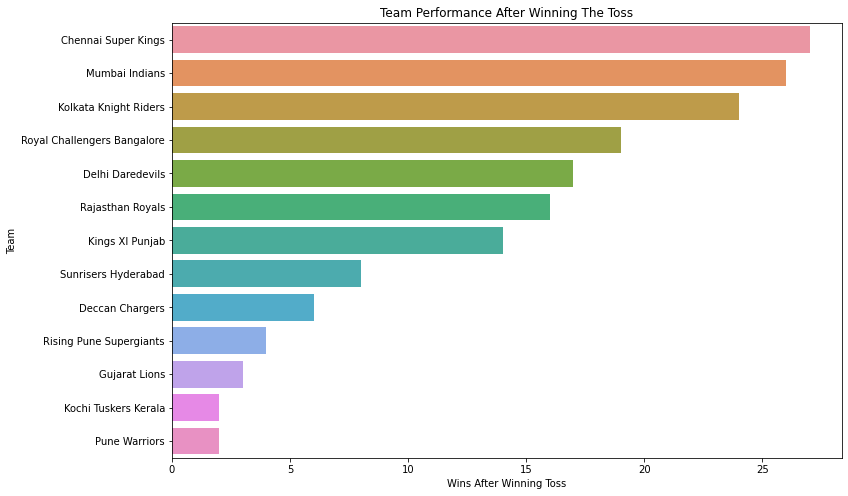

In [0]:
# plot 
team_toss_win_performance_pd = team_toss_win_performance.toPandas()
plt.figure(figsize=(12,8))
sns.barplot(x='wins_after_toss',y='team1',data=team_toss_win_performance_pd)
plt.title('Team Performance After Winning The Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()